### 1. Data Consistency & Quality

#### a. Feature Statistics Analysis
- **Method**: Use statistical analysis methods (mean, median, standard deviation, outliers detection via IQR or Z-score) on your feature data to detect inconsistencies.
- **Tip**: Highlight any features with high variance or those that deviate significantly from the rest, indicating potential labeling errors or outliers.

* Load and Inspect Data: Start by loading the metadata and feature files (.npy format) to understand the structure of your dataset. Inspect the basic statistics (mean, median, standard deviation) of the features to get an initial sense of the data.
* Identify Outliers: Look for outliers in the dataset by plotting histograms or using statistical methods (e.g., z-scores, IQR). Outliers might indicate wrongly labeled data or anomalies in the recording process.
* Label Consistency: Check if there are any labels that seem inconsistent with the majority of the data. For example, if you have text labels, ensure they are spelled correctly and used consistently.

### 1. Loading the Data

Given the size of the `.npy` file, it's essential to manage memory usage carefully. `numpy`'s `load` function is quite efficient, but we should ensure the system has enough RAM to handle the data. If memory issues arise, consider processing the data in chunks if possible.


In [1]:
import numpy as np

# Assuming the path to your file is correct on your local system
development_data = np.load('../dataset/development.npy')

# Aliases used in the folllowing
X = development_data
features = development_data


### 2. Inspecting the Data

After loading the data, you'll want to understand its structure:


In [2]:
print(f"Data Shape: {development_data.shape}")

Data Shape: (45296, 175, 44)


**What is the third dimension?**

### 3. Basic Statistical Analysis

Next, you can perform some basic statistical analyses to understand the data's distribution. Calculating statistics like mean, median, and standard deviation can provide insights into the nature of your features.


In [4]:
# Calculate and print basic statistics
mean_values = np.mean(development_data, axis=0)
median_values = np.median(development_data, axis=0)
std_deviation = np.std(development_data, axis=0)

print(f"Mean Values: {mean_values}")
print(f"Median Values: {median_values}")
print(f"Standard Deviation: {std_deviation}")

Mean Values: [[3.03942693e+03 3.03820133e+03 3.02769718e+03 ... 2.91792958e+03
  2.94516913e+03 2.96697957e+03]
 [2.22088099e+03 2.23360658e+03 2.24139082e+03 ... 1.94952912e+03
  1.97629488e+03 1.99801396e+03]
 [7.11134549e+00 7.10817809e+00 7.16383794e+00 ... 7.39666427e+00
  7.29964721e+00 7.22388765e+00]
 ...
 [1.43592282e+01 1.56439149e+01 1.69180138e+01 ... 1.07887624e+01
  1.06942310e+01 1.06914037e+01]
 [1.97987934e+03 1.98151096e+03 1.98160459e+03 ... 1.78225132e+03
  1.68788109e+03 1.56675985e+03]
 [1.61030168e-01 1.62471410e-01 1.64848717e-01 ... 1.31244370e-01
  1.33132617e-01 1.34781769e-01]]
Median Values: [[3.21434719e+03 3.21416410e+03 3.20197752e+03 ... 3.10212236e+03
  3.13316382e+03 3.15099551e+03]
 [2.23431136e+03 2.24250666e+03 2.25138852e+03 ... 1.93898789e+03
  1.97984403e+03 2.00690030e+03]
 [5.91345080e+00 5.93818675e+00 5.93470544e+00 ... 6.16267832e+00
  6.06618147e+00 6.02063743e+00]
 ...
 [2.43435139e-02 2.61135148e-02 2.79089501e-02 ... 3.80503759e-02
  3.


### 4. Identifying Outliers

#### **Statistical Methods**

##### Z-Score
The Z-score represents how many standard deviations away a data point is from the mean. Data points with a Z-score beyond a certain threshold (commonly 3 or -3) are considered outliers.


In [5]:
from scipy.stats import zscore

# Assuming 'features' is a NumPy array with your data
z_scores = np.abs(zscore(features, axis=0))
outliers = np.where(z_scores > 3)


##### Interquartile Range (IQR)
The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.


In [6]:
Q1 = np.percentile(features, 25, axis=0)
Q3 = np.percentile(features, 75, axis=0)
IQR = Q3 - Q1

# Identifying outliers
outlier_condition = ((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR)))
outliers = np.where(outlier_condition)


#### **Visualization**

##### Box Plots
Box plots visually show the distribution of the data, including outliers. Points that fall outside of the whiskers (1.5 times the IQR) are typically considered outliers.


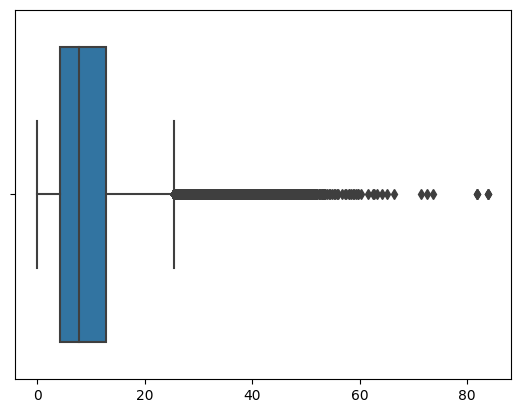

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for one feature
sns.boxplot(x=features[:,2])
plt.show()


##### Scatter Plots
Scatter plots can help visualize outliers in the context of two features. Outliers may appear far from the main cluster of data points.


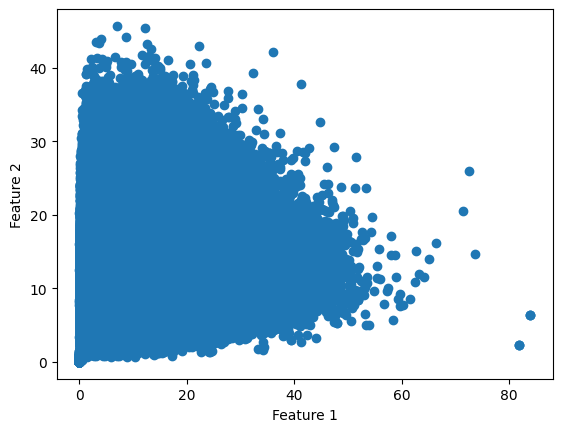

In [13]:
plt.scatter(features[:,2], features[:,5])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### **Domain-Specific Criteria**

In some cases, knowledge about the specific domain can help identify outliers. For example, if we know the expected range of feature values for audio energy, we can flag data points that fall outside this range as outliers. Unfortunately, we don't.

### Handling Outliers

Once identified, there are several options for dealing with outliers:
- **Remove**: If we're confident an outlier is due to error or noise, removing it might be best.
- **Cap/Floor**: Replace outlier values with the maximum/minimum allowed value.
- **Adjust**: For slightly off values, you might adjust them based on domain knowledge or surrounding data points.
- **Keep**: Sometimes, what appears to be an outlier is a valid data point that should be included in the analysis.



### 5. Checking Label Consistency

If metadata includes labels, ensure they're consistent (e.g., all labels are correctly spelled and used uniformly). If labels are stored separately, you'd load them similarly and inspect their distribution and consistency.

Given the limitations here, this strategy should get you started on your local environment. If you have specific questions about the process, need help with code snippets, or encounter any issues while implementing this, feel free to ask!

#### b. Auditory Examination
- **Method**: Listen to a random subset of recordings across different labels to assess biases.
- **Tip**: Report on accent, age, or background noise biases. Consider if the dataset includes a diverse representation of users and environments.

* Sample Recordings: Listen to a small, random set of recordings from each label to get a sense of the data's variety. Pay attention to accents, speech speed, and background noise.
* Biases: Note any biases you observe. For example, if all recordings are from speakers with the same accent or if background noise is consistently present, it might limit the model's ability to generalize to other environments.
* Representativeness: Consider whether the samples you've listened to seem representative of real-world usage. Are there any speech patterns, background noises, or situations missing that you'd expect in a household setting?

#### c. "Other" Sounds Classification
- **Method**: Categorize the types of "Other" sounds identified upon listening.
- **Tip**: Discuss whether these sounds are common in household settings and could interfere with command recognition.

* Explore "Other" Sounds: Listen to several examples from the "Other" category to identify the types of sounds included. Are these sounds likely to be encountered in a household environment (e.g., door closing, appliances working, pets)?
* Representativeness of "Other" Sounds: Determine whether the "Other" category is comprehensive enough to include a wide variety of household sounds. This is important for ensuring your model can distinguish between command words and background noise.

### 2. Label Characteristics

#### a. Grouping Strategy
- **Method**: Propose a logical grouping of the 20 words based on their functional use or similarity in sound.
- **Tip**: Explain your rationale, focusing on the goal to enhance recognition accuracy or to mitigate confusion between similar commands.

#### b. Class Balance Evaluation
- **Method**: Calculate the distribution of labels to identify any imbalances.
- **Tip**: Discuss potential challenges with unbalanced data, such as model bias towards more frequent labels, and propose strategies to address this (e.g., data augmentation, resampling).

### 3. Feature Characteristics

#### a. Distribution Analysis
- **Method**: Visualize the distributions of pre-computed features using histograms or density plots.
- **Tip**: Identify features with skewed or multimodal distributions that might need normalization or transformation.

#### b. Correlation Analysis
- **Method**: Utilize correlation matrices or scatter plots to identify correlated features.
- **Tip**: Suggest if and how you might reduce dimensionality or remove redundant features to improve model efficiency.

#### c. Speaker Variation
- **Method**: Analyze feature distributions across different speakers.
- **Tip**: Discuss if there are noticeable differences that could impact model performance and how speaker normalization could be applied.

### 4. Feature / Label Agreement

#### a. Feature Usefulness
- **Method**: Apply techniques like feature importance from tree-based models or univariate feature selection.
- **Tip**: Highlight features with strong correlations to labels and discuss their relevance for classification.

#### b. Similar Words Feature Distribution
- **Method**: Compare the feature distributions of similar-sounding words.
- **Tip**: Explore if these distributions overlap significantly and discuss implications for distinguishing these commands in practice.

### 5. Conclusion

- **Synthesis**: Bring together your key findings, emphasizing insights on data quality, label and feature characteristics, and their implications for model development.
- **Recommendations**: Offer concrete suggestions based on your analysis for improving the dataset or model training approach.

### Contribution Statement

- Detail each team member's contributions succinctly, ensuring transparency and accountability in your collaborative effort.

Remember, your report should not only answer these questions but also be concise, given the page limit. Use visual aids (charts, graphs) effectively to complement your textual analysis, keeping the balance between text and visuals within the prescribed limit.